In [1]:
import pandas as pd


# Nova seção

In [2]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
print(df1.head())


    Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8


In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
print(df.dtypes)

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object


In [9]:
# Consultando linhas com valores faltantes ou nulos.
print(df.isnull().sum())

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64


In [10]:
# Substituindo os valores nulos pel média.
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [11]:
print(df.isnull().sum())

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64


In [12]:
# Substituindo valores nulos por zero.
df["Vendas"].fillna(0, inplace=True)

In [13]:
# Apagando as linhas com valores nulos.
df.dropna(inplace=True)

In [14]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna.
df.dropna(subset=["Vendas"], inplace=True)

In [15]:
# Removendo linhas que estejam com valores faltantes em todas as colunas.
df.dropna(how="all", inplace=True)

In [ ]:
Criando colunas

In [20]:
# Criando a coluna de receita.
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita]
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita],Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,196.08,8.0


In [23]:
# Retornando a maior receita.
df["Receita"].max()

3544.0

In [24]:
# Retornando a menor receita.
df["Receita"].min()

3.34

In [30]:
# Identificando a 3 maiores receitas.
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita],Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,3436.0,4.0


In [31]:
# Agrupamento por cidade.
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
# Ordenando o conjunto de dados.
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita],Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,3112.0,4.0


In [ ]:
Trabalhando com datas


In [35]:
# Transformando a coluna de data em inteiro
df["Data"] = df["Data"].astype("int64")
print(df.dtypes)


Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita]          float64
Receita           float64
Receita/Vendas    float64
dtype: object


In [38]:
# Transformando coluna de datas em data.
df["Data"] = pd.to_datetime(df["Data"])
print(df.dtypes)

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita]                 float64
Receita                  float64
Receita/Vendas           float64
dtype: object


In [39]:
# Agrupamento por ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
# Criando uma coluna com o ano.
df["Ano_Venda"] = df["Data"].dt.year
print(df.sample(5))

        Cidade       Data  Vendas  ...  Receita  Receita/Vendas  Ano_Venda
109  Fortaleza 2019-03-02   18.90  ...   113.40             6.0       2019
55       Natal 2019-01-08  859.00  ...  3436.00             4.0       2019
24      Recife 2019-01-01   13.00  ...    26.00             2.0       2019
53     Aracaju 2018-01-01    8.64  ...    17.28             2.0       2018
41    Salvador 2019-02-13    9.86  ...    19.72             2.0       2019

[5 rows x 9 columns]


In [45]:
# Extraíndo o mês e o dia.
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
print(df.sample(5))

        Cidade       Data  Vendas  ... Ano_Venda  mes_venda  dia_venda
41   Fortaleza 2019-02-13  191.29  ...      2019          2         13
221   Salvador 2019-01-02  142.23  ...      2019          1          2
136     Recife 2019-03-02   39.09  ...      2019          3          2
117     Recife 2019-03-02   15.42  ...      2019          3          2
124    Aracaju 2018-01-01  139.64  ...      2018          1          1

[5 rows x 11 columns]


In [47]:
# Retonando a data mais antiga.
print(df["Data"].min())

2018-01-01 00:00:00


In [48]:
# Calculando a diferença de dias.
df["diferenca_dias"] = df["Data"] - df["Data"].min()
print(df.sample(10))

        Cidade       Data  Vendas  ... mes_venda  dia_venda  diferenca_dias
115    Aracaju 2018-01-01   50.99  ...         1          1          0 days
66     Aracaju 2018-01-01   76.59  ...         1          1          0 days
30     Aracaju 2018-01-01  119.21  ...         1          1          0 days
92      Recife 2019-01-01  163.02  ...         1          1        365 days
57   Fortaleza 2019-01-01  129.07  ...         1          1        365 days
214      Natal 2019-01-02   54.94  ...         1          2        366 days
123   Salvador 2019-03-02  127.45  ...         3          2        425 days
208   Salvador 2019-01-02   39.40  ...         1          2        366 days
15     Aracaju 2018-01-01  153.28  ...         1          1          0 days
175   Salvador 2019-01-02   16.53  ...         1          2        366 days

[10 rows x 12 columns]


In [49]:
# Criando a coluna de trimestre.
df["trimestre_venda"] = df["Data"].dt.quarter
print(df.sample(10))

        Cidade       Data  Vendas  ... dia_venda  diferenca_dias  trimestre_venda
96       Natal 2019-01-02   42.94  ...         2        366 days                1
230      Natal 2019-01-03  184.69  ...         3        367 days                1
10       Natal 2018-10-27  828.00  ...        27        299 days                4
17    Salvador 2019-02-14  158.66  ...        14        409 days                1
14     Aracaju 2018-01-01  148.21  ...         1          0 days                1
38      Recife 2019-01-01  104.53  ...         1        365 days                1
41   Fortaleza 2019-02-13  191.29  ...        13        408 days                1
18     Aracaju 2018-01-01   32.14  ...         1          0 days                1
47   Fortaleza 2019-01-01   13.45  ...         1        365 days                1
7      Aracaju 2019-01-01  172.22  ...         1        365 days                1

[10 rows x 13 columns]


In [51]:
# Filtrando as vendas de 2019 do mês de março.
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
print(vendas_marco_19)

        Cidade       Data  Vendas  ... dia_venda  diferenca_dias  trimestre_venda
108  Fortaleza 2019-03-02  152.89  ...         2        425 days                1
109  Fortaleza 2019-03-02   18.90  ...         2        425 days                1
110  Fortaleza 2019-03-02   51.98  ...         2        425 days                1
111  Fortaleza 2019-03-02    8.00  ...         2        425 days                1
112  Fortaleza 2019-03-02  133.59  ...         2        425 days                1
..         ...        ...     ...  ...       ...             ...              ...
137   Salvador 2019-03-02   51.66  ...         2        425 days                1
138   Salvador 2019-03-02  212.03  ...         2        425 days                1
139   Salvador 2019-03-02  169.01  ...         2        425 days                1
140   Salvador 2019-03-02   20.79  ...         2        425 days                1
141   Salvador 2019-03-02    9.08  ...         2        425 days                1

[121 rows x 13 

In [ ]:
Visualização de dados

In [52]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

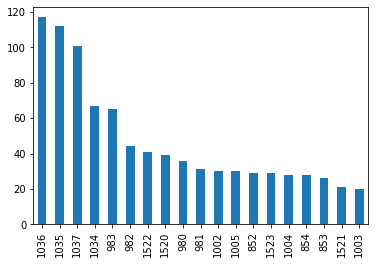

In [53]:
# Gráfica de barras.
df["LojaID"].value_counts(ascending=False).plot.bar()

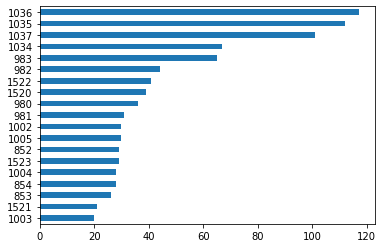

In [56]:
df["LojaID"].value_counts(ascending=True).plot.barh();

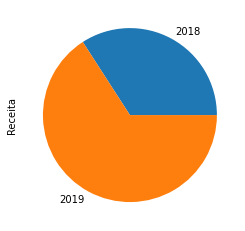

In [57]:
# Gráfico de Pizza.
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();


In [58]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

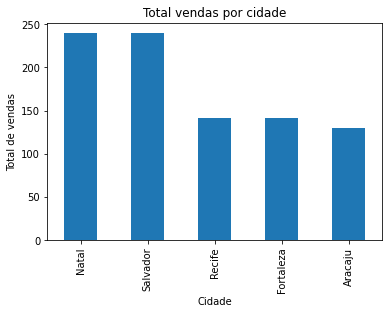

In [60]:
# Adicionando um título e alterando o nome dos eixos.
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

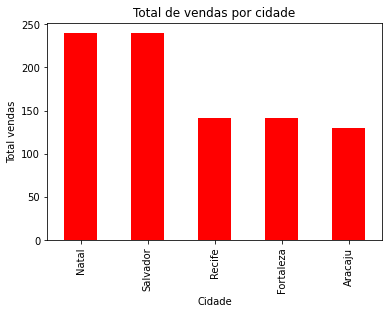

In [61]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [62]:
# Alterando o estilo
plt.style.use("ggplot")

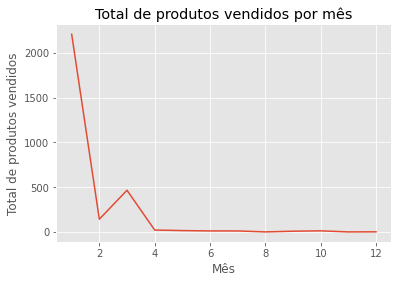

In [68]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");



In [71]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
print(df_2019)

       Cidade       Data  Vendas  ... dia_venda  diferenca_dias  trimestre_venda
7     Aracaju 2019-01-01  172.22  ...         1        365 days                1
8     Aracaju 2019-01-01   12.16  ...         1        365 days                1
9     Aracaju 2019-01-01  149.36  ...         1        365 days                1
10    Aracaju 2019-01-01   42.34  ...         1        365 days                1
11    Aracaju 2019-01-01  161.53  ...         1        365 days                1
..        ...        ...     ...  ...       ...             ...              ...
235  Salvador 2019-01-03   41.84  ...         3        367 days                1
236  Salvador 2019-01-03  126.29  ...         3        367 days                1
237  Salvador 2019-01-03   38.06  ...         3        367 days                1
238  Salvador 2019-01-03  139.64  ...         3        367 days                1
239  Salvador 2019-01-03  161.41  ...         3        367 days                1

[729 rows x 13 columns]


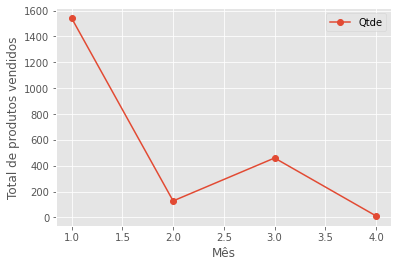

In [73]:
# Total de produtos vendidos por mês.
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

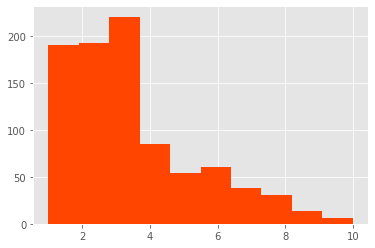

In [74]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

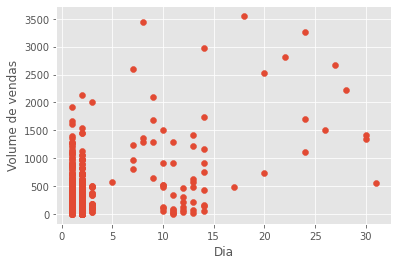

In [77]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])
plt.xlabel("Dia")
plt.ylabel("Volume de vendas");

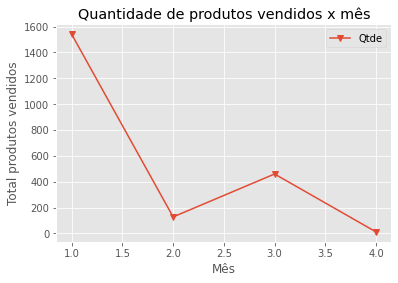

In [78]:
# Salvando em PNG.
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x Mes.png")